In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [90]:
df = pd.read_csv('Cleaned_breast_cancer_data.csv')
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Splitting into training and test data

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('diagnosis',axis=1),df['diagnosis'],random_state=1,test_size=0.4)

#### Normalizing the dataset

In [92]:
from sklearn.preprocessing import MinMaxScaler

X_train_n = normalize(MinMaxScaler().fit_transform(X_train))
X_test_n = normalize(MinMaxScaler().fit_transform(X_test))

#### Training the SVC model

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

params = {'C':[0.1,1,10,100],'gamma':[0.001,0.01,0.1]}
gcv = (GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=params, cv=3, scoring='recall', verbose=0, refit=True)
       .fit(X_train_n, y_train))

In [94]:
gcv.best_params_

{'C': 10, 'gamma': 0.1}

In [95]:
gcv.best_score_

0.9015151515151515

In [96]:
y_pred = gcv.predict(X_test_n)

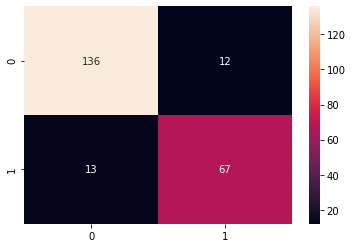

In [97]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')